In [1]:
import os, yaml, sys
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
import h5py, cv2
from IPython.display import clear_output
ENV = os.getenv("MY_ENV", "dev")
with open("../../config.yaml", "r") as f:
    config = yaml.safe_load(f)
paths = config[ENV]["paths"]
sys.path.append(paths["src_path"])
from general_utils.utils import TimeSeries, print_wise
from image_processing.utils import read_video
from image_processing.gaze_dep_models import sequential_gaze_dep_mod

In [2]:
from dataclasses import dataclass, field

@dataclass
class Cfg:
    sub_num = 3
    fs = 50
    
cfg = Cfg()

In [3]:
run = 1
eyetracking_dir = f"{paths['data_dir']}/data/eyetracker_data"
eyetracking_file = f"{eyetracking_dir}/gaze_sub{cfg.sub_num:03d}_run{run:02d}_{cfg.fs}Hz.mat"

In [4]:
g, ts = load_eyetracking_data(paths, cfg.sub_num, run, cfg.fs, xy=True)
g.resample(23.98)    
g.set_array(np.round(g.get_array()).astype(int))

In [75]:
v = read_video(paths, 0, 1, vid_duration=80)


09:09:24 - rank 0 /Users/tizianocausin/1917_local/stimuli/Project1917_movie_part1_24Hz.mp4 read successfully


In [7]:
nframes, h, w, c = v.shape
print(h, w)

522 1280


In [63]:
43692/50

873.84

In [62]:
frame_count/23.98 - 5

873.7322768974145

In [59]:
print(frame_count -121)

20951.0


In [4]:
subs = list(range(3, 24))
subs.extend([25, 28, 30, 31, 34])

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def extract_circular_patch(canvas, cx, cy, radius, fill_value=128):
    """
    Extract a circular patch around (cx, cy) with radius.
    Pads with fill_value if circle goes outside canvas.
    
    canvas: (H, W, C) image
    cx, cy: center coordinates (pixels)
    radius: radius of circle (pixels)
    fill_value: value to fill outside canvas
    """
    H, W, C = canvas.shape
    diameter = 2 * radius
    
    # Initialize patch with fill_value
    patch = np.ones((diameter, diameter, C), dtype=canvas.dtype) * fill_value
    
    # Compute coordinates in canvas
    x_start_canvas = max(cx - radius, 0)
    x_end_canvas   = min(cx + radius, W)
    y_start_canvas = max(cy - radius, 0)
    y_end_canvas   = min(cy + radius, H)
    
    # Compute coordinates in patch
    x_start_patch = max(0, radius - cx)
    x_end_patch   = x_start_patch + (x_end_canvas - x_start_canvas)
    y_start_patch = max(0, radius - cy)
    y_end_patch   = y_start_patch + (y_end_canvas - y_start_canvas)
    
    # Copy pixels into patch
    patch[y_start_patch:y_end_patch, x_start_patch:x_end_patch, :] = \
        canvas[y_start_canvas:y_end_canvas, x_start_canvas:x_end_canvas, :]
    
    # Create circular mask
    Y, X = np.ogrid[:diameter, :diameter]
    dist_from_center = np.sqrt((X - radius)**2 + (Y - radius)**2)
    circle_mask = dist_from_center <= radius
    
    # Apply mask: everything outside circle -> fill_value
    patch[~circle_mask] = fill_value
    circle_pixels = patch[circle_mask]
    return circle_pixels#patch


In [ ]:
def read_video(paths, rank, movie_part, vid_duration=0):
    video_path = f"{paths['data_dir']}/stimuli/Project1917_movie_part{movie_part}_24Hz.mp4" 
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        raise FileNotFoundError(f"Cannot open video file: {video_path}")

    
    video = np.zeros((frames_to_loop, height, width, 3), dtype=np.uint8) # standard [B, H, W, C]
    counter = 0
    total = cap.get(cv2.CAP_PROP_FRAME_COUNT)
    for frame_idx in range(frames_to_loop):
        ret, frame = cap.read()
        if not ret:
            raise RuntimeError(f"Failed to read frame {counter} from {video_path}")
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        video[frame_idx, :, :, :] = frame
        counter += 1
    # end while True
    print_wise(f"{video_path} read successfully", rank=rank)
    cap.release()
    return video


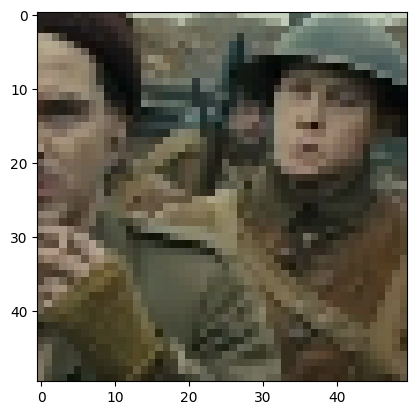

In [ ]:
plt.imshow(resized.reshape((50, 50, 3),order="F"))

In [32]:
with h5py.File(outfn, "w") as f:
    f.create_dataset("vecrep", data=resized)

In [33]:
with h5py.File(outfn, "r") as f:
    print(list(f.keys()))

['vecrep']


In [ ]:
from image_processing.utils import get_video_dimensions

In [ ]:
movie_path = f"{paths['data_dir']}/stimuli/Project1917_movie_part1_24Hz.mp4"
cap = cv2.VideoCapture(movie_path)


get_video_dimensions(cap)

(522, 1280, 21072)

In [53]:
frames_n - round(5*fps)

20832

# todo wr function that works in parallel

In [60]:
from einops import rearrange

In [ ]:
def pixelwise_lum(frame_patch, features, sq_side_resized):
    resized = cv2.resize(frame_patch, (sq_side_resized, sq_side_resized), interpolation=cv2.INTER_LINEAR)
    resized.ravel(order='F')
    features.append(resized)
    # no need of return feats as its modified in-place
# EOF

def save_pixelwise_lum(paths, model_name, sub_num, run, *args, **kwargs):
    save_name = "aa"
    return save_name

In [4]:
import time
screen_res = (1080, 1920)
gray_value = 128  # mid-gray
sq_side = 224
sq_side_resized = 50

# TODO commit and then loop through the runs and then run in parallel

In [5]:
from image_processing.gaze_dep_models import pixelwise_lum, save_pixelwise_lum
rank = 0; model_name = "pixelwise_luminance"; sub_num = 5; run = 1; fs = 50;

sequential_gaze_dep_mod(paths, rank, sub_num, pixelwise_lum, save_pixelwise_lum, sq_side, model_name, run, fs, *(50,), screen_res=(1080, 1920), secs_to_skip=5, )

09:23:30 - rank 0 processed first 0th frames
09:23:33 - rank 0 processed first 1000th frames
09:23:36 - rank 0 processed first 2000th frames
09:23:39 - rank 0 processed first 3000th frames
09:23:42 - rank 0 processed first 4000th frames
09:23:44 - rank 0 processed first 5000th frames
09:23:47 - rank 0 processed first 6000th frames
09:23:50 - rank 0 processed first 7000th frames
09:23:53 - rank 0 processed first 8000th frames
09:23:55 - rank 0 processed first 9000th frames
09:23:58 - rank 0 processed first 10000th frames
09:24:01 - rank 0 processed first 11000th frames
09:24:04 - rank 0 processed first 12000th frames
09:24:06 - rank 0 processed first 13000th frames
09:24:09 - rank 0 processed first 14000th frames
09:24:12 - rank 0 processed first 15000th frames
09:24:15 - rank 0 processed first 16000th frames
09:24:18 - rank 0 processed first 17000th frames
09:24:21 - rank 0 processed first 18000th frames
09:24:24 - rank 0 processed first 19000th frames
09:24:28 - rank 0 processed first

In [179]:
with h5py.File("/Users/tizianocausin/1917_local/models/sub004_run01_pixelwise_luminance_gazedep_224x224rect_to_50x50_24Hz.h5", "r") as f:
    feats = f['vecrep'][:]


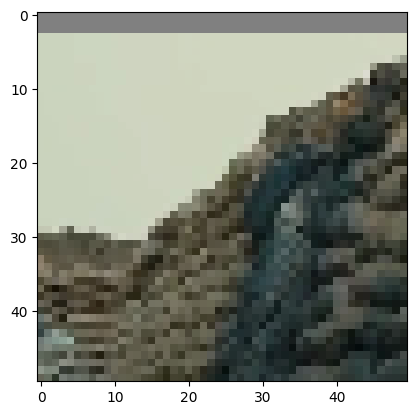

KeyboardInterrupt: 

In [180]:
for i in range(feats.shape[1]):
    f = np.reshape(feats[:, i], (sq_side_resized, sq_side_resized, 3), order='F')
    plt.imshow(f)
    clear_output(wait=True)
    plt.show()
    time.sleep(0.01)

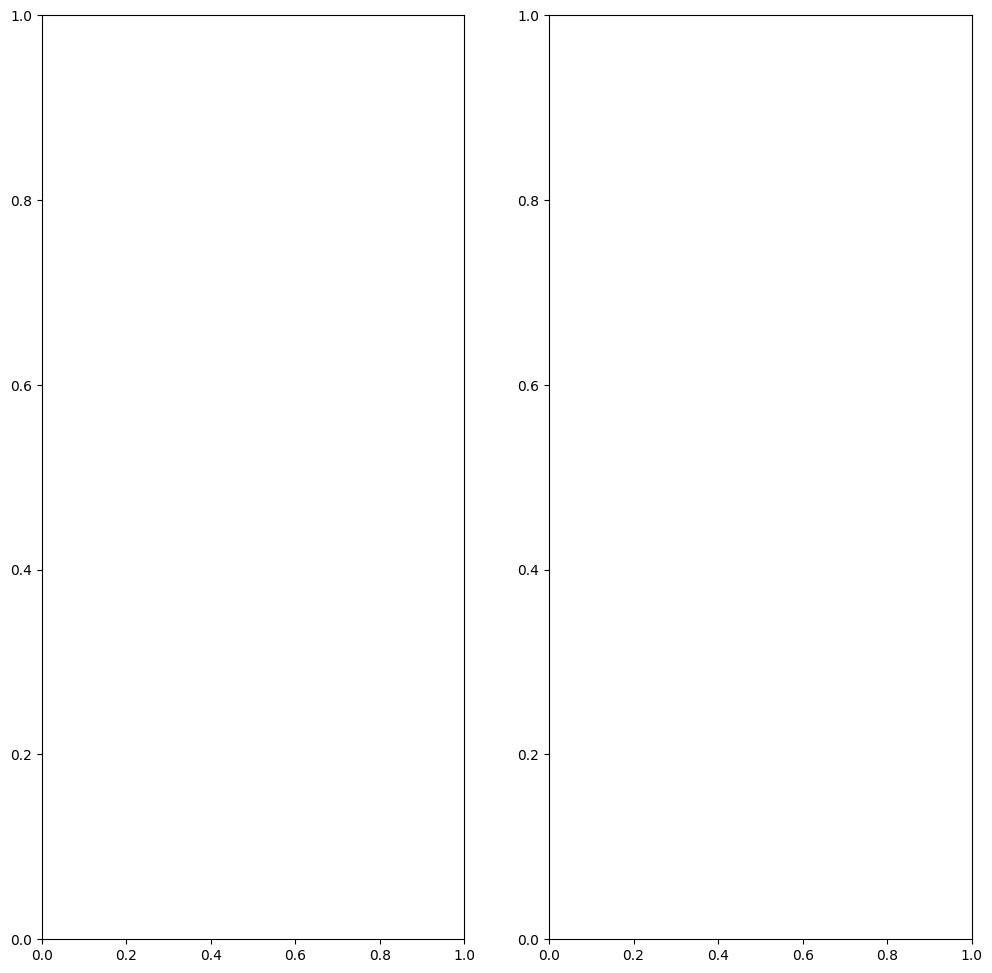

In [16]:
screen_res = (1080, 1920)
gray_value = 128  # mid-gray
sq_side = 224
sq_side_resized = 50
cap = cv2.VideoCapture(f"{paths['data_dir']}/stimuli/Project1917_movie_part1_24Hz.mp4")
h, w, frame_n = get_video_dimensions(cap)
offset_dims = ((screen_res[0] -h)//2 , ( screen_res[1] - w)//2)
resHor, resVer = 1920, 1080
canvas = None
cap.set(cv2.CAP_PROP_POS_FRAMES, int(5*23.98))
for idx, xy in enumerate(g):
    fig, ax = plt.subplots(1, 2, figsize=(12, 12))
    if idx == 1000:
        break
    # canvas = pad_frame(v[round(5*23.98) + idx-1, :,:,:], movie_dims, offset_dims, canvas=canvas)
    ret, frame = cap.read()
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    canvas = pad_frame(frame, (h,w), offset_dims, canvas=None)
    # p = extract_circular_patch(canvas, xy[0], xy[1], 50, fill_value=128)
    p = extract_square_patch(canvas, xy[0], xy[1], sq_side)#, fill_value=128)
    resized = cv2.resize(p, (sq_side_resized, sq_side_resized), interpolation=cv2.INTER_LINEAR)
    ax[0].imshow(canvas)
    ax[0].scatter(xy[0], xy[1], color='green')
    ax[0].set_xlim(0, resHor)
    ax[0].set_ylim(resVer, 0)
    # ax[1].imshow(canvas2)
    # # ax[1].scatter(xy[0], xy[1], color='green')
    # ax[1].set_xlim(0, resHor)
    # ax[1].set_ylim(resVer, 0)
    # assert np.array_equal(canvas2,canvas)
    ax[1].imshow(resized)
    plt.show()
    clear_output(wait=True)

In [102]:
round(5*23.98)

120

In [50]:
print(frame_count - len(g))


117.0


In [ ]:
frame_count/23

20955

In [52]:
117/5

23.4

In [38]:
5*23.98

119.9

In [ ]:
movie_part = 1
video_path = f"{paths['data_dir']}/stimuli/Project1917_movie_part{movie_part}_24Hz.mp4" 
cap = cv2.VideoCapture(video_path)
if not cap.isOpened():
    raise FileNotFoundError(f"Cannot open video file: {video_path}")
frame_count = cap.get(cv2.CAP_PROP_FRAME_COUNT)
# assert frame_count == len(g)

for idx, xy in enumerate(g):
    ret, frame = cap.read()
    if not ret:
        raise RuntimeError(f"Failed to read frame {idx} from {video_path}")

    canvas = pad_frame(v[idx, :,:,:], movie_dims, offset_dims, canvas=canvas)
    p = extract_square_patch(canvas, xy[0], xy[1], sq_side)#, fill_value=128)
    resized = cv2.resize(p, (sq_side_resized, sq_side_resized), interpolation=cv2.INTER_LINEAR)

AssertionError: 

In [34]:
with h5py.File("/Volumes/TIZIANO/models/Project1917_OFdir_run01_movie24Hz.mat", "r") as f:
    print(f.keys())



<KeysViewHDF5 ['fsVid', 'tVid', 'vecrep']>


In [ ]:
from scipy.io import loadmat
a = loadmat("/Volumes/TIZIANO/models/Project1917_real_alexnet_real_fc_layer2_run01_movie24Hz.mat")["vecrep"]

In [37]:
a.shape

(933, 20953)

In [ ]:
from einops import rearrange

In [51]:
v_vec = TimeSeries(rearrange(v, 'b h w c -> (h w c) b'), 23.98)
v_vec.resample(50)

In [56]:
for f in v_vec:
    f = f.reshape(522, 1280, 3)           
    plt.imshow(f)
    plt.show()
    clear_output(wait=True)

KeyboardInterrupt: 

In [ ]:
for idx, xy in enumerate(g):
    fig, ax = plt.subplots(1, 2)
    if idx == 200:
        break
    canvas = pad_frame(v[idx, :,:,:], movie_dims, offset_dims, canvas=canvas)
    # p = extract_circular_patch(canvas, xy[0], xy[1], 50, fill_value=128)
    p = extract_square_patch(canvas, xy[0], xy[1], sq_side)#, fill_value=128)
    resized = cv2.resize(p, (sq_side_resized, sq_side_resized), interpolation=cv2.INTER_LINEAR)